## TO CREATE Synthetic Data in between the nearest minority data to make equal as mojority. THis technique ensure variance as well

In [1]:
from sklearn.datasets import make_classification  ## To create binary classification


In [2]:
X,y = make_classification(n_samples=1000, n_redundant=0,n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12)  # 90% more than other feature

In [3]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2']) ## Independet Feature
df2 = pd.DataFrame(y,columns=['target']) ## Dependent on the X
final_df = pd.concat([df1,df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

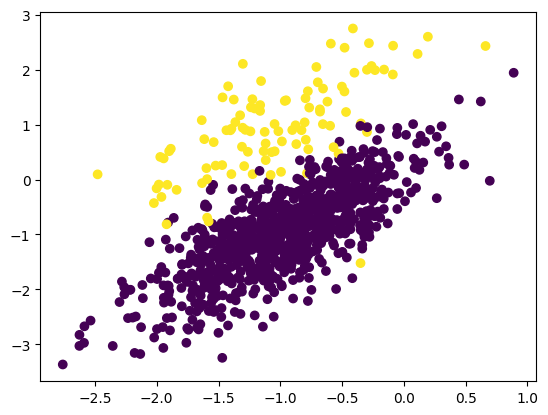

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'], c=final_df['target'])


In [6]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE ## This library connects the dots internally and create synthetic data 

In [8]:
# Transform the Dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [9]:
X.shape

(1800, 2)

In [10]:
y.shape

(1800,)

In [11]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [12]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [13]:
df1 = pd.DataFrame(X,columns=['f1','f2']) ## Independet Feature
df2 = pd.DataFrame(y,columns=['target']) ## Dependent on the X
oversample_df = pd.concat([df1,df2], axis=1)

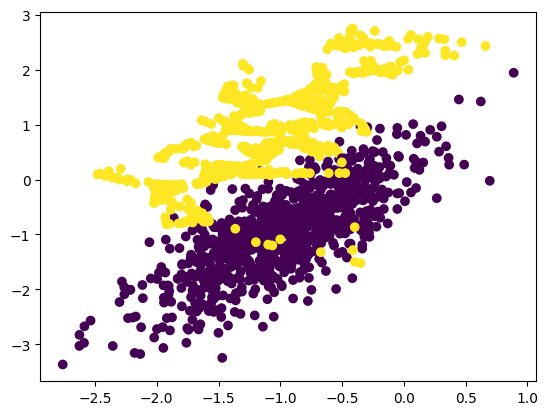

In [14]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])